# Kalman Filter Basics and Implementation

### **What is the Kalman filter?**

Imagine you find yourself in a dark room, where you can’t really see much. The room is at least 100 cm$^2$,  poorly lit, and pretty much empty. After a few moments, you realize you are not alone. You listen closely, and you hear a squeaking noise: **a mouse is somewhere in the room with you**!

Obviously, you don’t enjoy being in the same room with a mouse, so you set out to find and contain it. But that’s not an easy task, as you can’t tell where exactly the mouse is. You think you should be able however to observe where the mouse might be by hearing the squeaking noise and looking around the room. That is, at best, you only get **noisy observations** of the mouse’s location (**state**).

You also have learned from (unfortunate) prior experience with mice, that they can travel up to ~3.6m/s. But you figure that if you keep a bit quiet and remain as stealthy as possible, the mouse might not realise you are after it. That way, you hope, it will be less likely to run and easier to catch.

So you believe that a more acceptable estimate for the mouse’s speed, as it moves around the room, would be ~5cm/s. Of course, the mouse can change direction any time, move faster or slower than the estimate, or even remain still. Therefore, a lot of uncertainty surrounds this expected value. Nevertheless, barring more information this is a good enough way to **predict** how the **state changes**.

Now you have a way to **measure** (or observe) **the state of the system** (i.e., mouse position) and a different way to **predict how it changes**. The former is referred to as the observation model, and the latter as the prediction model (formal definitions follow).

Given these two *models*, **the Kalman filter is a mathematical algorithm (i.e., a finite sequence of instructions) that uses a series of noisy mesurements to identify the value of a sysem’s variables that change over time** (i.e., estimate the state of a dynamic system).

### What is a “state”?

The *state* refers to “the least amount of data one has to know” about the system’s behavior in the past, in order to be able to predict how it is going to behave in the future (Kalman, 1960). It can be a set of variables representing key aspects of the system such as the mouse’s velocity, the room’s temperature, sensory stimuli the mouse might receive and others.

As the observations we have are only a noisy representation of the state, the true state is unknown. The Kalman filter uses the prediction model to produce a preliminary estimate for the state and then combines this estimate with the measurement value of the observation model to come up with the “final” state estimate for a given time step.

### The predict and update process

The process of estimating the state is this:

- Start from an initial estimate of the state and a measure of its uncertainty
- Predict the next state given the previous state, the system’s dynamic (i.e., transitions, control units) and uncertainty.
- Blend the previous prediction with the new observation (once this is available), weighing each with their associated uncertainties. More prediction uncertainty implies less influence on the state estimate. Similarly for observation uncertainty. The weights are calculated from the covariance of the prediction (observation) noise.
- Repeat the previous two steps (called prediciton-update cycle) as new measurements become available.

### **Formal definition**

The problem of identifying the mouse’s position using a time series of noisy observations can be formulated with a state-space model. Such models describe how a set of variables (state variables) evolve through time because of receiving new inputs and responding to disturbances.

Given a linear dynamic system with noisy observations, the Kalman filter is **an (optimal) recursive algorithm** to estimate the state variables of the system. State-space systems are comprised of (i) a state and (ii) an observation equation.

The state equation (or transition/process model) is defined below:

$x_t=A_t x_{t-1}+B_t u_t+w_t$     (1)

where

- $x_t,x_{t-1}$ : are the system's states at times t and t-1 respectively
- $A_t$          :  is the state-transition matrix applied to the previous state
- $B_t$          :  is the control-input matrix applied to the control vector
- $u_t$          :  is the control vector
- $w_t$          :  is the process noise, with zero mean and covariance $Q_t$, $v_t\text{\textasciitilde}N(0,Q_t)$
    
    

The measurement (or observation) equation, which relates the vector of observations  to the system’s states , is defined below:

$z_t=H_t x_t+v_t$     (2)

where

- $z_t$          :  is the predicted observation mean
- $H_t$        :  is the measurement or observation matrix that maps the true state into the
    
                    observed space
    
- $v_t$          :  is the observation noise, with zero mean and covariance $R_t$, $v_t\text{\textasciitilde}N(0,R_t)$

$v_t$ can be a Gausian white noise series or it can be drawn from a multivariate normal distribution with zero mean. $w_t$ is a zero mean Gaussian white noise series.  $v_t$ and $w_t$ are independent of each other.

The Kalman filter derives its estimate about the current state using a predict-and-update mechanism. During the **predict stage** an *a priori* estimate about the current state is generated, while an *a priori* covariance matrix estimate is also produced.  The predicted *(a priori*) state estimate and covariance are given by:

$\text{\^{x}}^-_t=A_t\text{\^{x}}_{t-1} + B_tu_{t-1}$         (3)

$P^-_t=A_tP_{t-1}A^T_t + Q_{t-1}$     (4)

During the **update** **stage**, a difference/residual between the current observation and the *a priori* predicted state estimate is calculated. Then, an *a posteriori* state estimate is produced as the combination of the predicted state estimate and the residual (i.e., preliminary forecast error)multiplied by the *optimal* Kalman gain.

The innovation, or measurement residual, and its covariance:

${\tilde{y}}_t=z_t - H_t\text{\^{x}}^-_t$                      (5)

$S_t = H_tP^-_tH^T_t + R_t$             (6)

The Kalman gain is a scaling factor that adjusts the contributions of the predicted state vs the observation. A higher gain gives more weight to the observation, whereas a lower gain gives more weight to the prediction. It is calculated based on the observation noise covariance R_t, the observation matrix H_t and the prediction error covariance P_t.

The formula to calculate the Kalman gain is:

$K_t = P^-_tH^T_tS^{-1}_t$             (7)

So, the higher (lower) the observation uncertainty, the lower (higher) the Kalman gain and the higher (lower) the weight given to the prediction. Lastly, to calculate the *a posteriori* state estimate and its covariance:

$\text{\^{x}}_t = \text{\^{x}}^-_t + K_t{\tilde{y}}_t$               (8)

$P_t = (I - K_tH_t)P^-_t$      (9)

Lastly, the posterior residual (eq. 5) is re-calculated using the corrected state estimates.

### **Does the Kalman filter provide optimal state estimates?**

Formula (9) is valid when the calculation uses the optimal  which minimizes the residual error. So, the *a posteriori* estimate for state  at time *t* (that is ) is the best estimate of the system’s true state at that time, given all information (i.e., every observation or measurement) until that point.

This assumes that both the process and measurement errors are Gaussian white noise series and are independent/uncorrelated, the noise covariances are known, and on top of that the model fits the underlying real phenomenon and describes it accurately.

To check whether the filter performs optimally, you can see if the output prediction error is  a white noise. That is, the Kalman filter performs optimally because it minimises the mean square error of the difference of the estimated and the true state.

### Useful resources

- [https://en.wikipedia.org/wiki/Kalman_filter](https://en.wikipedia.org/wiki/Kalman_filter)
- Kalman, R. E., 1960. [A New Approach to Linear Filtering and Prediction Problems](https://github.com/yyccR/papers/blob/master/kalman%20filter/A%20New%20Approach%20to%20Linear%20Filtering%20and%20Prediction%20Problems.pdf)
- [Kalman Filter With Python Code](https://medium.com/@ab.jannatpour/kalman-filter-with-python-code-98641017a2bd)
- Quantopian Kalman filter [lecture](https://github.com/quantopian/research_public/tree/master/notebooks/lectures/Kalman_Filters)
- Kalman and Bayesian Filters in Python [Book](https://nbviewer.org/github/rlabbe/Kalman-and-Bayesian-Filters-in-Python/blob/master/table_of_contents.ipynb)
- [https://web.mit.edu/kirtley/kirtley/binlustuff/literature/control/Kalman filter.pdf](https://web.mit.edu/kirtley/kirtley/binlustuff/literature/control/Kalman%20filter.pdf)
- Tsay, R., 2010 . Analysis of Financial Time Series. Chapter 11 State-Space Models and Kalman Filter
    

In [195]:
import numpy as np
import pandas as pd
from scipy.linalg import inv, pinv
from pykalman import KalmanFilter


msft_price = pd.read_csv("./assets/qrm/qrm_MSFTPrices.csv").set_index('Date')
msft_price.head()


,Open,High,Low,Close,Volume,Adjusted
Date,,,,,,
2000-01-03,88.777,89.722,84.712,58.28125,53228400,38.527809
2000-01-04,85.893,88.588,84.901,56.31250,54119000,37.226345
2000-01-05,84.050,88.021,82.726,56.90625,64059600,37.618851
2000-01-06,84.853,86.130,81.970,55.00000,54976600,36.358688
2000-01-07,82.159,84.901,81.166,55.71875,62013600,36.833828


## Pykalman

In [240]:

# Construct a Kalman filter
kf = KalmanFilter(transition_matrices = [1],
                  observation_matrices = [1],
                  initial_state_mean = 0,
                  initial_state_covariance = 1,
                  observation_covariance=1,
                  transition_covariance=.01)


In [241]:

# Use the observed values of the price to get a rolling mean
state_means, _ = kf.filter(msft_price.Adjusted.values)

In [245]:

state_means = pd.Series(state_means.flatten(), index=msft_price.index)
msft_price = pd.concat([msft_price,state_means],axis=1).rename({0:'KF'},axis=1)

msft_price.loc[:,'mean15'] = msft_price['Adjusted'].rolling(window = 15).mean()
msft_price.loc[:,'mean30'] = msft_price['Adjusted'].rolling(window = 30).mean()
msft_price.loc[:,'mean60'] = msft_price['Adjusted'].rolling(window = 60).mean()
msft_price.loc[:,'mean90'] = msft_price['Adjusted'].rolling(window = 90).mean()

In [248]:
msft_price

,Open,High,Low,Close,Volume,Adjusted,KF,mean15,mean30,mean60,mean90
Date,,,,,,,,,,,
2000-01-03,88.777,89.722,84.712,58.281250,53228400,38.527809,19.263904,NaN,NaN,NaN,NaN
2000-01-04,85.893,88.588,84.901,56.312500,54119000,37.226345,25.330689,NaN,NaN,NaN,NaN
2000-01-05,84.050,88.021,82.726,56.906250,64059600,37.618851,28.501302,NaN,NaN,NaN,NaN
2000-01-06,84.853,86.130,81.970,55.000000,54976600,36.358688,30.162117,NaN,NaN,NaN,NaN
2000-01-07,82.159,84.901,81.166,55.718750,62013600,36.833828,31.371347,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2018-02-12,89.157,90.202,88.343,89.129997,35720300,88.713272,89.505111,90.845257,89.394074,86.618280,84.225411
2018-02-13,89.348,90.423,88.212,89.830002,26407700,89.410004,89.496064,90.707902,89.536405,86.731913,84.396974
2018-02-14,88.510,90.990,88.410,90.809998,34960900,90.809998,89.621052,90.669189,89.711801,86.865229,84.570008


<AxesSubplot:xlabel='Date'>

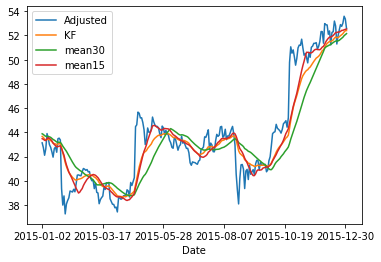

In [184]:
msft_price[['Adjusted','KF','mean30','mean15']].loc["2015-01-01":"2016-01-01"].plot()

## Implementation

In [368]:
class KalmanFilterImplementation():
    
    def __init__(self,                 
                 curr_state_mean,
                 curr_state_covariance,
                 state_transition_matrix, 
                 state_transition_covariance,
                 observation_matrix,
                 observation_covariance,                 
                 observations):
        '''
        x  is the initial state mean (a vector of n states)
        P  is the initial state covariance
        A  is the state transition matrix (nxn)
        H  is the observation or measurement matrix that maps 
           the true state into the observed space
        Q  is the covariance of the state process noise
        R  is the covariance of the observation noise

        A, Q, H, R are considered time invariant for this exercise

        '''
        self.x   = curr_state_mean
        self.P   = curr_state_covariance
        self.A   = state_transition_matrix
        self.Q   = state_transition_covariance
        self.H   = observation_matrix
        self.R   = observation_covariance
        self.O   = observations
        self.z   = 0
    
        self.state_mean_post = []
        self.k_gain = []
        self.residual_post = []
        self.residual_prior = []

    def _predict_step(self):
        
        # predicted (prior) state estimate
        # ..from transition matrix and current state
        self.x = np.dot( self.A, self.x )

        # predicted (prior) covariance matrix
        # ..from transition matrix, current state covar and noise covar
        self.P = np.dot( self.A, np.dot( self.P, self.A.T ) ) + self.Q


    def _update_step(self):
        
        # residual of observation minus predicted observation
        y = self.z - np.dot( self.H, self.x )
        
        # predicted observation covariance
        S = np.dot( self.H, np.dot( self.P, self.H.T ) ) + self.R
        
        # Kalman gain
        K = np.dot( self.P, np.dot( self.H.T, pinv(S) ) )
        
        # posterior state estimate mean
        self.x = self.x + np.dot( K, y )

        # posterior state covariance
        self.P = self.P - np.dot( K, np.dot( self.H, self.P ) )
        
        # posterior residuals
        y_post = self.z - np.dot( self.H, self.x )

        # keep track of posterior state means, Kalman gain and posterior and prior residuals
        self._store(K,y,y_post)
        
    
    def _store(self, K, y, y_post):
        self.state_mean_post.append( [i[0] for i in self.x] )
        self.k_gain.append(K[0][0])
        self.residual_post.append(y_post[0][0])
        self.residual_prior.append(y[0][0])
        
    
    def run_filter(self):
        
        for time_t, observation_at_time_t in enumerate(self.O):
            self.z = observation_at_time_t
            
            # predict step to estimate state mean and covariance
            self._predict_step()
            
            # estimate posterior state mean and covariance
            self._update_step()
            
            


In [369]:
# kf = KalmanFilter(transition_matrices = [1],
#                   observation_matrices = [1],
#                   initial_state_mean = 0,
#                   initial_state_covariance = 1,
#                   observation_covariance=1,
#                   transition_covariance=.01)


kfi = KalmanFilterImplementation( 
                            curr_state_mean               = np.array([[0]]),
    
                            curr_state_covariance         = np.array([[1]]),
    
                            state_transition_matrix       = np.array([[1]]), 
    
                            state_transition_covariance   = np.array([[0.01]]),
    
                            observation_matrix            = np.array([[1]]),
    
                            observation_covariance        = np.array([[1]]),    
    
                            observations                  = list(msft_price.Adjusted.values)
                          )

# kfi = KalmanFilterImplementation( 
#                             curr_state_mean               = np.array([[0],
#                                                                       [0]]),
    
#                             curr_state_covariance         = np.array([[1, 0], 
#                                                                       [0, 1]]),
    
#                             state_transition_matrix       = np.array([[1, 1], 
#                                                                       [0, 1]]), 
    
#                             state_transition_covariance   = np.array([[1e-4, 1e-4], 
#                                                                       [1e-4, 1e-4]]),
    
#                             observation_matrix            = np.array([[1, 0]]),
    
#                             observation_covariance        = np.array([[2e-1]]),    
    
#                             observations                  = list(msft_price.Adjusted.values)
#                           )

<AxesSubplot:xlabel='Date'>

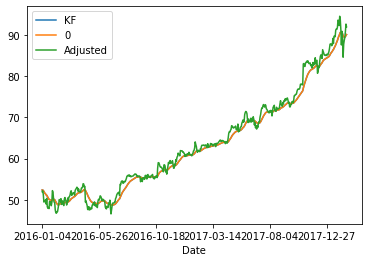

In [374]:
r2 = pd.concat([msft_price.KF.reset_index()
           ,pd.DataFrame(kfi.state_mean_post)[0],
           msft_price.Adjusted.reset_index().drop('Date',axis=1)
          ]
          ,axis=1).set_index('Date').loc['2016-01-01':]

r2.plot()

In [375]:
r2

,KF,0,Adjusted
Date,,,
2016-01-04,52.360114,52.360114,51.927593
2016-01-05,52.341505,52.341505,52.164490
2016-01-06,52.234527,52.234527,51.216900
2016-01-07,51.968265,51.968265,49.435444
2016-01-08,51.741753,51.741753,49.587063
...,...,...,...
2018-02-12,89.505111,89.505111,88.713272
2018-02-13,89.496064,89.496064,89.410004
2018-02-14,89.621052,89.621052,90.809998


<AxesSubplot:>

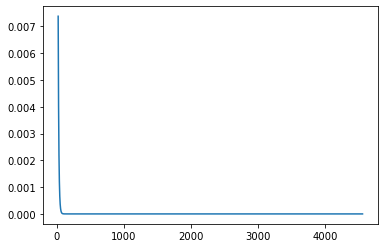

In [346]:
rr = pd.concat([msft_price.KF.reset_index()
           ,pd.DataFrame(kfi.state_mean)[0]],axis=1)[['KF',0]].diff(axis=1)[0].iloc[20:]

rr.plot()

## Kalman filter with python code approach
https://medium.com/@ab.jannatpour/kalman-filter-with-python-code-98641017a2bd

In [147]:

# system model
A = np.array([[1, 1], [0, 1]])

# measurement model
H = np.array([[1, 0]])

# initial state
x = np.array([[0], [0]])

# initial state covariance
P = np.array([[1, 0], [0, 1]])

# process noise covariance
Q = np.array([[1e-4, 1e-4], [1e-4, 1e-4]])

# measurement noise covariance
R = np.array([[2e-1]])

el = list()
obs = list()
res = list()
for i in range(2001):
    # prediction
    x = A.dot(x)
    P = A.dot(P).dot(A.T) + Q
    
    # measurement
    z = H.dot(x) + np.random.normal(0, np.sqrt(R))

    # update
    y = z - H.dot(x)
    S = H.dot(P).dot(H.T) + R
    K = P.dot(H.T).dot(inv(S))
    x = x + K.dot(y)
    P = P - K.dot(H).dot(P)
    el.append((x[0][0],x[1][0],z[0][0]))
    obs.append((x[0][0],z[0][0]))
    res.append(y[0][0])

<AxesSubplot:>

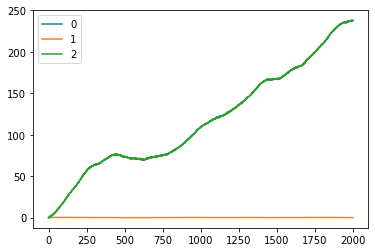

In [148]:
pd.DataFrame(el).plot()

<AxesSubplot:>

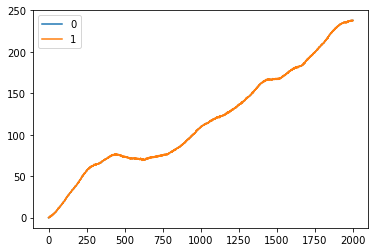

In [149]:
pd.DataFrame(obs).plot()

<AxesSubplot:>

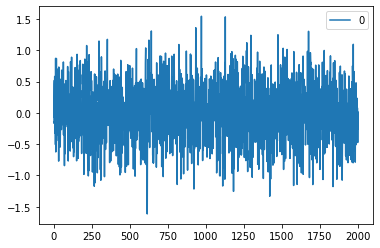

In [280]:
pd.DataFrame(res).plot()

In [142]:
from statsmodels.stats import stattools

In [309]:
stattools.jarque_bera(list(rr.values)[20:])

(37801996.9381689, 0.0, 19.95255960009158, 449.1857823087226)

In [367]:
stattools.jarque_bera(kfi.residual[1000:])

(14698.845375397023, 0.0, 0.028605188671838765, 12.953001516681777)

In [312]:
kfi.residual

[38.527809,
 17.86660017910448,
 12.205231357718496,
 7.788540799906407,
 6.614516216572827,
 5.68254919436211,
 3.8189882860300344,
 2.084558291099995,
 2.4645889473964004,
 3.619552003209556,
 4.197093903224669,
 0.9663391028988997,
 0.528340231081053,
 -0.27247487079148414,
 -1.0700100917474629,
 -0.44266257333011083,
 -1.533712399279672,
 -1.585750273125477,
 -1.5928998298658001,
 -1.5593569701820584,
 0.26706700381872395,
 -0.46138071282589266,
 0.513059040857641,
 1.4343550802409908,
 1.3166236135962919,
 2.284786178168808,
 0.10283654109296947,
 0.7540346113813214,
 -1.3220135185989434,
 -1.298891598777864,
 -1.5259933332592794,
 -1.6901793941427243,
 -0.8678938863382513,
 -2.293196213217918,
 -2.4878017488747837,
 -2.106164470299337,
 -1.7402859841109688,
 -2.710777371934661,
 -2.370053653398948,
 -2.867486688244419,
 -2.119416948127867,
 -1.070717783861074,
 -0.05986521503173137,
 -1.8720917272301385,
 -0.9502667037592261,
 0.02844864487253318,
 1.4924909965966968,
 1.68103358

<AxesSubplot:>

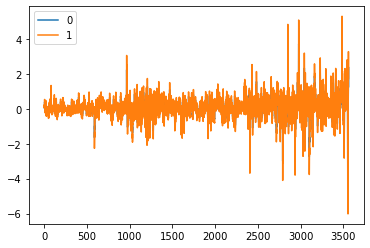

In [366]:
pd.DataFrame([kfi.residual[1000:],kfi.residual_pre[1000:]]).T.plot()